In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("loan_data_set.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Handling Missing Value


In [7]:
categrocial_cols = df.select_dtypes(include=["object"]).columns
numberimal_cols = df.select_dtypes(include=["number"]).columns

In [10]:
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy = "mean")
df[numberimal_cols] = num_imp.fit_transform(df[numberimal_cols])

In [9]:
cat_imp = SimpleImputer(strategy = "most_frequent")
df[categrocial_cols] = cat_imp.fit_transform(df[categrocial_cols])

In [11]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

EDA : Exploratory Data Analysis

Text(0.5, 1.0, 'IS LOAN APPROVED YES OR NO')

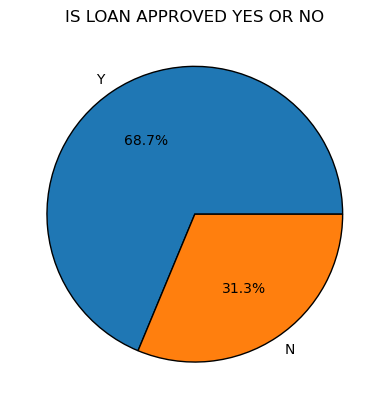

In [12]:
classes_count = df["Loan_Status"].value_counts()

plt.pie(
    classes_count,
    labels = ["Y","N"],
    autopct="%1.1f%%",
    wedgeprops={"edgecolor": "black", "linewidth": 1}
    )
plt.title("IS LOAN APPROVED YES OR NO")

[Text(0, 0, '480'), Text(0, 0, '134')]

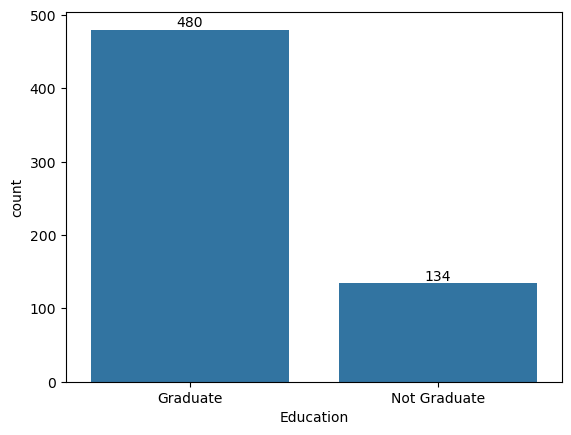

In [13]:
education_count = df["Education"].value_counts()
ax = sns.barplot(education_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '532'), Text(0, 0, '82')]

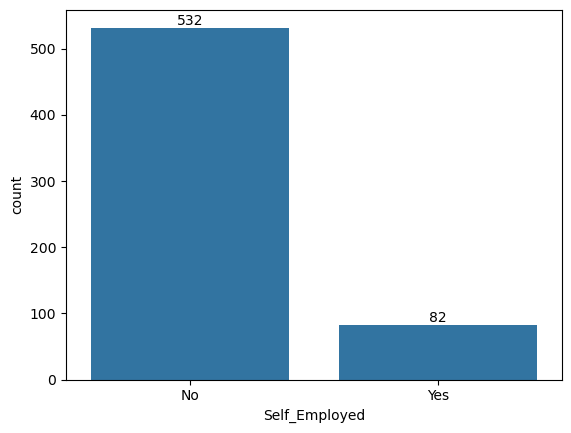

In [60]:
self_employed = df["Self_Employed"].value_counts();
ax = sns.barplot(self_employed)
ax.bar_label(ax.containers[0])

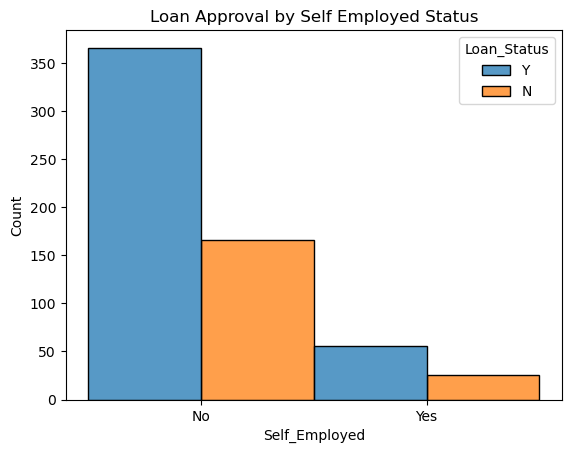

In [14]:
#Loan approved with Self_Employed
sns.histplot (
    data = df,
    x = "Self_Employed",
    hue = "Loan_Status",
    bins = 2,
    multiple = "dodge"
)
plt.title("Loan Approval by Self Employed Status")
plt.show()

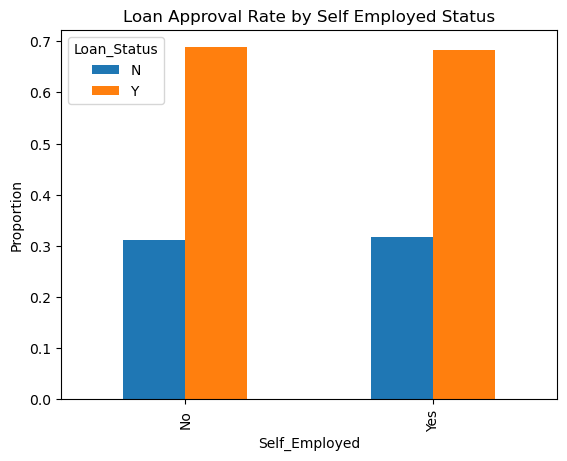

In [61]:
approval_rate = (
    df.groupby("Self_Employed")["Loan_Status"]
      .value_counts(normalize=True)
      .unstack()
)

approval_rate.plot(kind="bar")
plt.title("Loan Approval Rate by Self Employed Status")
plt.ylabel("Proportion")
plt.show()



In [15]:
df = df.drop("Loan_ID",axis = 1)
df = df.drop("Property_Area",axis = 1)
df = df.drop("CoapplicantIncome",axis = 1)

ENCODING

In [19]:

df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
le = LabelEncoder()
df["Education"] = le.fit_transform(df["Education"])


In [23]:
df

,Education,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,ApplicantIncome_210.0,ApplicantIncome_416.0,...,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_342.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_0.8421985815602837,Credit_History_1.0
0,0,Y,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,N,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,Y,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,Y,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,Y,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
610,0,Y,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
611,0,Y,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
612,0,Y,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [24]:
# cols = ["Gender","Married","Dependents","Self_Employed","ApplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History" ]
# ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# encoded = ohe.fit_transform(df[cols])
# encoded_df = pd.DataFrame(encoded, 
#                           columns=ohe.get_feature_names_out(cols),
#                           index=df.index)

# df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)

In [26]:
df.columns

Index(['Education', 'Loan_Status', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Self_Employed_Yes',
       'ApplicantIncome_210.0', 'ApplicantIncome_416.0',
       ...
       'Loan_Amount_Term_84.0', 'Loan_Amount_Term_120.0',
       'Loan_Amount_Term_180.0', 'Loan_Amount_Term_240.0',
       'Loan_Amount_Term_300.0', 'Loan_Amount_Term_342.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0',
       'Credit_History_0.8421985815602837', 'Credit_History_1.0'],
      dtype='object', length=727)

In [38]:
df.shape


(614, 727)

Train_Test_Split

In [28]:
X = df.drop("Loan_Status" , axis = 1)
y = df["Loan_Status"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

TRAIN and Evaluate Model

In [30]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

In [32]:
print("Logistic Regression Model")
precision = precision_score(y_test, y_pred, pos_label='Y')
print("Precision: ")
recall = recall_score(y_test, y_pred, pos_label='Y')
f1 = f1_score(y_test, y_pred, pos_label='Y')

Logistic Regression Model
Precision: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Columns: 727 entries, Education to Credit_History_1.0
dtypes: float64(725), int64(1), object(1)
memory usage: 3.4+ MB
